In [198]:
# Import Libs
import math
import numpy as np
import matplotlib.pyplot as plt

# Support LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [227]:
def plot_system_results(system_name, ax, st_data, mt_data, xticks, counts):
    bar_width = 0.45
    
    st_err = map(lambda x: x * 0.06, st_data)
    mt_err = map(lambda x: x * 0.06, mt_data)
    
    highest = max(st_data + mt_data)
    max_plot_value = 10 #math.ceil(highest) + math.ceil(highest) % 2
    
    ax.bar(xticks - bar_width / 2, st_data, bar_width, color="r", yerr=st_err, capsize=5)
    ax.bar(xticks + bar_width / 2, mt_data, bar_width, color="b", yerr=mt_err, capsize=5)
    
    # Set up chart style
    ax.grid(True, "major", "y")
    ax.set_xticks(xticks)
    ax.set_xticklabels(counts)
    ax.set_title(f"\\textbf{{{system_name}}}", fontsize=16)
    ax.set_xlabel(R"\textbf{Agent Count}", fontsize=14)
    ax.set_ylabel(R"\textbf{ms}", fontsize=14)
    ax.set_ylim(bottom=0.0, top = highest + highest * 0.1)
    
    accuracy = 10
    y_ticks = []
    for i in range(accuracy):
        y_ticks.append(round(highest * (i/(accuracy-2)), 2))
    ax.set_yticks(y_ticks)
    
    ax.legend(("Single Threaded", "Multi Threaded"))

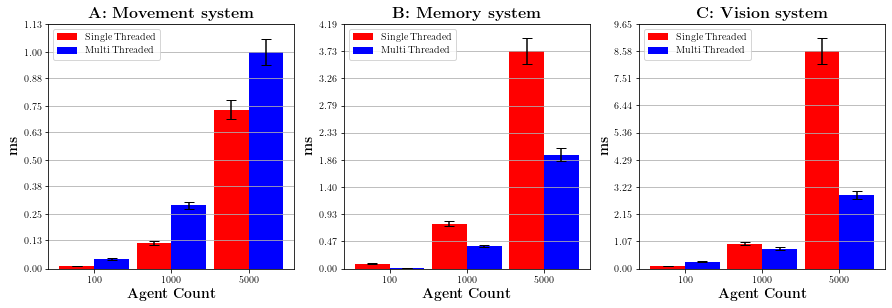

In [228]:
# Axes and ticks
system_names = ("Memory System", "Vision System")
agent_counts = (100, 1000, 5000)
xticks = np.arange(len(agent_counts))

# Memory system data
mem_st_msf = (0.085, 0.771, 3.725)
mem_mt_msf = (0.0043, 0.384, 1.951)

# Vision system data
vis_st_msf = (0.086, 0.981, 8.580)
vis_mt_msf = (0.277, 0.790, 2.899)

# Movement system data
mov_st_msf = (0.012, 0.118, 0.734)
mov_mt_msf = (0.044, 0.292, 1.001)

# Plot
fig, axes = plt.subplots(1, 3, figsize = (15,4.5))

plot_system_results("A: Movement system", axes[0], mov_st_msf, mov_mt_msf, xticks, agent_counts)
plot_system_results("B: Memory system", axes[1], mem_st_msf, mem_mt_msf, xticks, agent_counts)
plot_system_results("C: Vision system", axes[2], vis_st_msf, vis_mt_msf, xticks, agent_counts)

plt.show()
fig.savefig("fig_st_vs_mt_performance_systems.pdf", bbox_inches='tight')